In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Obtener una muestra de m elementos
def getSample(m,d,w):
    S = np.random.uniform(-1000,1000,(m,d))
    y = []
    for i in range(len(S)):
        x = np.r_[1,S[i]]
        y.append(np.sign(np.dot(w,x)))
    return np.c_[S,y]

In [4]:
# Algoritmo para encontrar el vector clasificador
def getPerceptron(S,d):
    w = np.zeros(d+1)
    bien_clasificados = 0
    pasos = 0
    registro = [w]
    while bien_clasificados < len(S):
        bien_clasificados = 0
        for i in range(len(S)):
            x = np.r_[1,S[i][:-1]]
            clasificacion = np.sign(np.dot(w,x))
            if clasificacion == S[i][-1]:
                bien_clasificados += 1
            else:
                w = w + S[i][-1]*x
                pasos += 1
                registro.append(w)
    return [w,pasos,registro]

In [5]:
# Dimension del espacio a clasificar
d = 2

In [66]:
# Predictor correcto
w = np.array([-1,1,1])

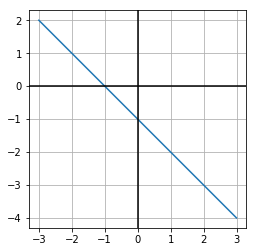

In [67]:
# Graficar clasificador
x = np.linspace(-abs(w[0])*3, abs(w[0])*3, num=10)

if w[2] == 0:
    y = np.linspace(-10,10,100)
    x = w[1]/w[0]
else:
    y = (w[0] - w[1]*x)/w[2]

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_aspect('equal')
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

In [7]:
# Obtener una muestra
m = 100
S = getSample(m,d,w)

In [8]:
# Obtener el perceptron, que es la hipotesis que funciona
[h,pasos,registro] = getPerceptron(S,d)

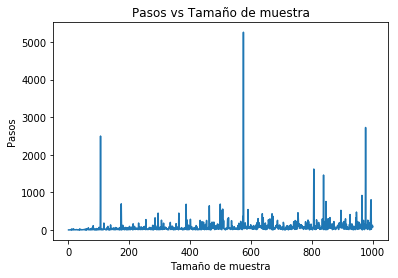

In [125]:
# Graficar los pasos necesarios para encontrar una hipotesis correcta
x = []
y = []
for m in range(1,1001):
    S = getSample(m,d,w)
    [h,pasos,registro] = getPerceptron(S,d)
    x.append(m)
    y.append(pasos)
plt.plot(x, y)
plt.title('Pasos vs Tamaño de muestra')
plt.xlabel('Tamaño de muestra')
plt.ylabel('Pasos')
plt.show()

In [122]:
# Crear una muestra y encontrar el perceptron
S = getSample(100,d,w)
[h,pasos,registro] = getPerceptron(S,d)

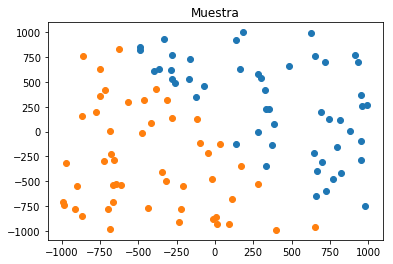

In [123]:
# Graficar muestra obtenida
x1 = []
y1 = []
x2 = []
y2 = []
for row in S:
    if row[-1] == 1:
        x1.append(row[0])
        y1.append(row[1])
    else:
        x2.append(row[0])
        y2.append(row[1])
plt.plot(x1,y1,'o')
plt.plot(x2,y2,'o')
plt.title('Muestra')
plt.show()

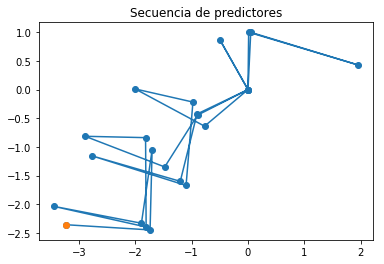

In [124]:
# Graficar secuencia de predictores
x = []
y = []
for w in registro:
    r = np.sqrt(w[1]**2 + w[2]**2)
    if r == 0:
        r = 1
    x.append(w[0]*w[1]/r)
    y.append(w[0]*w[2]/r)
w = registro[-1]
plt.plot(x, y,'-o')
plt.plot(x[-1], y[-1],'o')
plt.title('Secuencia de predictores')
plt.show()

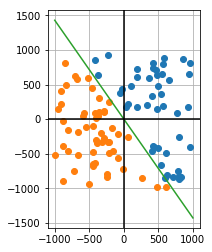

In [116]:
# Graficar muestra y predictor obtenido
x = np.linspace(-1000, 1000, num=10)
if w[2] == 0:
    y = np.linspace(-10,10,100)
    x = w[1]/w[0]
else:
    y = (w[0] - w[1]*x)/w[2]

fig, ax = plt.subplots()
ax.plot(x1,y1,'o')
ax.plot(x2,y2,'o')
ax.plot(x, y)
ax.set_aspect('equal')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

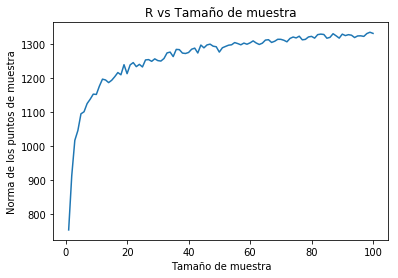

In [119]:
# Graficar promedio de la nomra maxima en conjuntos de muestra
# segun el tamaño de muestra
promedios = []
for m in range(1,101):
    promedio = 0
    for i in range(100):
        S = getSample(m,d,w)
        R = 0
        for xi in S:
            norm = np.dot(xi,xi)
            if norm > R:
                R = norm
        promedio += np.sqrt(R)
    promedios.append(promedio/100)
plt.plot(range(1,101), promedios)
plt.title('R vs Tamaño de muestra')
plt.xlabel('Tamaño de muestra')
plt.ylabel('Norma de los puntos de muestra')
plt.show()

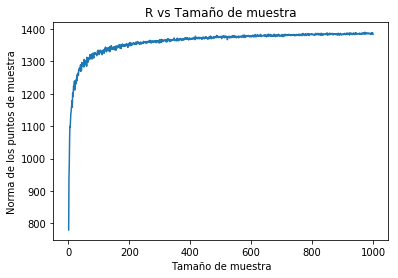

In [120]:
# Graficar promedio de la nomra maxima en conjuntos de muestra
# segun el tamaño de muestra
promedios = []
for m in range(1,1001):
    promedio = 0
    for i in range(100):
        S = getSample(m,d,w)
        R = 0
        for xi in S:
            norm = np.dot(xi,xi)
            if norm > R:
                R = norm
        promedio += np.sqrt(R)
    promedios.append(promedio/100)
plt.plot(range(1,1001), promedios)
plt.title('R vs Tamaño de muestra')
plt.xlabel('Tamaño de muestra')
plt.ylabel('Norma de los puntos de muestra')
plt.show()